<a href="https://colab.research.google.com/github/SBGuillermo/TFM-AnalisisComercio/blob/main/Notebooks/4_Analisis_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis RFM

en este notebooks vamos a llevar a cabo una clasificación e los clientes siguiendo el metodo de análisis RFM, que tiene en cuenta el dinero gastado por el cliente, la frecuencia de compra y la última vez que compró

In [1]:
#importamos las librerias más importantes que vamos a usar en este notebook
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn

Populating the interactive namespace from numpy and matplotlib


Como en los anteriores Notebooks nos descargamos el dataset en dos archivos distintos debido a su tamaño, y luego procederemos a concatenarlos

In [2]:
!wget https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table1.csv

--2021-07-09 10:58:04--  https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17889332 (17M) [text/plain]
Saving to: ‘Table1.csv’

Table1.csv          100%[===================>]  17.06M  --.-KB/s    in 0.1s    

2021-07-09 10:58:04 (132 MB/s) - ‘Table1.csv’ saved [17889332/17889332]



In [3]:
!wget https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table2.csv

--2021-07-09 10:58:04--  https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17784301 (17M) [text/plain]
Saving to: ‘Table2.csv’

Table2.csv          100%[===================>]  16.96M  --.-KB/s    in 0.09s   

2021-07-09 10:58:04 (181 MB/s) - ‘Table2.csv’ saved [17784301/17784301]



In [4]:
#convertimos el archivo csv en un Dataframe de pandas
df1 = pd.read_csv('/content/Table1.csv')
df1

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,285947,561967,22400,other,3,2011-08-01 13:11:00,0.39,12844.0,United Kingdom,1.17
199996,199996,285948,561967,82482,WOODEN PICTURE FRAME WHITE FINISH,5,2011-08-01 13:11:00,2.55,12844.0,United Kingdom,12.75
199997,199997,285949,561967,82551,other,3,2011-08-01 13:11:00,1.45,12844.0,United Kingdom,4.35
199998,199998,285950,561967,82552,other,3,2011-08-01 13:11:00,1.45,12844.0,United Kingdom,4.35


In [5]:
#convertimos el archivo csv en un Dataframe de pandas
df2 = pd.read_csv('/content/Table2.csv')
df2

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,200000,285952,561967,23306,other,3,2011-08-01 13:11:00,1.45,12844.0,United Kingdom,4.35
1,200001,285953,561967,47504H,other,1,2011-08-01 13:11:00,0.79,12844.0,United Kingdom,0.79
2,200002,285954,561967,21907,other,6,2011-08-01 13:11:00,2.10,12844.0,United Kingdom,12.60
3,200003,285955,561967,21992,other,3,2011-08-01 13:11:00,1.25,12844.0,United Kingdom,3.75
4,200004,285956,561967,21754,other,2,2011-08-01 13:11:00,5.95,12844.0,United Kingdom,11.90
...,...,...,...,...,...,...,...,...,...,...,...
197919,397919,541904,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
197920,397920,541905,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
197921,397921,541906,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
197922,397922,541907,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [6]:
#concatenamos los dos dataframes para tener todos los datos unidos
df = pd.concat([df1,df2], axis=0)
df

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...
197919,397919,541904,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
197920,397920,541905,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
197921,397921,541906,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
197922,397922,541907,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [7]:
#borramos las columnas que no vamos a necesitar para este análisis
df = df.drop(['Unnamed: 0','Unnamed: 0.1', 'Description', 'Quantity', 'UnitPrice', 'Country', 'StockCode'], axis=1)

In [8]:
df

,InvoiceNo,InvoiceDate,CustomerID,PrecioTotal
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34
...,...,...,...,...
197919,581587,2011-12-09 12:50:00,12680.0,10.20
197920,581587,2011-12-09 12:50:00,12680.0,12.60
197921,581587,2011-12-09 12:50:00,12680.0,16.60
197922,581587,2011-12-09 12:50:00,12680.0,16.60


Agruparemos nuestros datos por transacciones.
Debido a que debemos saber la frecuencia y la ultima vez que un cliente uso nuestro servicio, no podemos agrupar directamente por cliente

In [9]:
transaction = df.groupby(['InvoiceNo','CustomerID', 'InvoiceDate'], as_index=False).sum()
transaction

,InvoiceNo,CustomerID,InvoiceDate,PrecioTotal
0,536365,17850.0,2010-12-01 08:26:00,139.12
1,536366,17850.0,2010-12-01 08:28:00,22.20
2,536367,13047.0,2010-12-01 08:34:00,278.73
3,536368,13047.0,2010-12-01 08:34:00,70.05
4,536369,13047.0,2010-12-01 08:35:00,17.85
...,...,...,...,...
18561,581583,13777.0,2011-12-09 12:23:00,124.60
18562,581584,13777.0,2011-12-09 12:25:00,140.64
18563,581585,15804.0,2011-12-09 12:31:00,329.05
18564,581586,13113.0,2011-12-09 12:49:00,339.20


Convertiremos la columna InvoiceDate en un objeto datatime-data para eliminar las horas de la fecha de cada transaccion y asi reducir la dimension de las futuras variables

In [10]:
transaction['InvoiceDate'] = pd.to_datetime(transaction['InvoiceDate'])
transaction["day"] = transaction["InvoiceDate"].dt.date
transaction

,InvoiceNo,CustomerID,InvoiceDate,PrecioTotal,day
0,536365,17850.0,2010-12-01 08:26:00,139.12,2010-12-01
1,536366,17850.0,2010-12-01 08:28:00,22.20,2010-12-01
2,536367,13047.0,2010-12-01 08:34:00,278.73,2010-12-01
3,536368,13047.0,2010-12-01 08:34:00,70.05,2010-12-01
4,536369,13047.0,2010-12-01 08:35:00,17.85,2010-12-01
...,...,...,...,...,...
18561,581583,13777.0,2011-12-09 12:23:00,124.60,2011-12-09
18562,581584,13777.0,2011-12-09 12:25:00,140.64,2011-12-09
18563,581585,15804.0,2011-12-09 12:31:00,329.05,2011-12-09
18564,581586,13113.0,2011-12-09 12:49:00,339.20,2011-12-09


In [11]:
transaction = transaction.drop(['InvoiceDate'], axis=1)
transaction

,InvoiceNo,CustomerID,PrecioTotal,day
0,536365,17850.0,139.12,2010-12-01
1,536366,17850.0,22.20,2010-12-01
2,536367,13047.0,278.73,2010-12-01
3,536368,13047.0,70.05,2010-12-01
4,536369,13047.0,17.85,2010-12-01
...,...,...,...,...
18561,581583,13777.0,124.60,2011-12-09
18562,581584,13777.0,140.64,2011-12-09
18563,581585,15804.0,329.05,2011-12-09
18564,581586,13113.0,339.20,2011-12-09


Debemos calcular cual es el último día que se hizo una transación y establecer ese día como punto de calculo para las demás transacciones.
Debido a que no todos los usuarios hicieron la primera compra el mismo día, la frecuencia y el dinero gastado no se podran coger en valor absoluto, sino que habrá que relativizarlos con la antigüedad de cada uno de los usuarios.

In [12]:
transaction['day'].max()

datetime.date(2011, 12, 9)

In [13]:
last_day = dt.date(2011,12,10)

Establecemos la cantidad de dinero absoluto gastado por cada uno de nuestros usuarios.

In [14]:
total_money_value= transaction.groupby(['CustomerID'], as_index=False).sum()
total_money_value = total_money_value.drop(['InvoiceNo'], axis=1)
total_money_value

,CustomerID,PrecioTotal
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


Establecemos la antigüedad de cada uno de nuestros usuarios. Para ello restamos el día de la primera comprar con el último día de que tenemos datso, que anteriormente cogimos como referencia

In [15]:
normalice = transaction.groupby(['day', 'CustomerID'], as_index=False).count()
normalice = normalice.drop(['InvoiceNo','PrecioTotal'], axis=1)
normalice

,day,CustomerID
0,2010-12-01,12431.0
1,2010-12-01,12433.0
2,2010-12-01,12583.0
3,2010-12-01,12662.0
4,2010-12-01,12748.0
...,...,...
16761,2011-12-09,17428.0
16762,2011-12-09,17490.0
16763,2011-12-09,17581.0
16764,2011-12-09,17754.0


In [16]:
normalice['seniority'] = ''
normalice

,day,CustomerID,seniority
0,2010-12-01,12431.0,
1,2010-12-01,12433.0,
2,2010-12-01,12583.0,
3,2010-12-01,12662.0,
4,2010-12-01,12748.0,
...,...,...,...
16761,2011-12-09,17428.0,
16762,2011-12-09,17490.0,
16763,2011-12-09,17581.0,
16764,2011-12-09,17754.0,


In [17]:
for x in range (0, len(normalice)):
  normalice.iloc[x,2] = (last_day - normalice.iloc[x,0]).days

In [18]:
normalice

,day,CustomerID,seniority
0,2010-12-01,12431.0,374
1,2010-12-01,12433.0,374
2,2010-12-01,12583.0,374
3,2010-12-01,12662.0,374
4,2010-12-01,12748.0,374
...,...,...,...
16761,2011-12-09,17428.0,1
16762,2011-12-09,17490.0,1
16763,2011-12-09,17581.0,1
16764,2011-12-09,17754.0,1


In [19]:
type(normalice.iloc[0,2])

int

In [20]:
normalice = normalice.drop(['day'], axis=1)

Para conseguir la antigüedad de cada usuario, debemos agrupar todas transacciones hechas por cada usuario, cogiendo solamente la primera de ellas

In [21]:
normalice_final= normalice.groupby(['CustomerID'], as_index=False).max()
normalice_final

,CustomerID,seniority
0,12346.0,326
1,12347.0,368
2,12348.0,359
3,12349.0,19
4,12350.0,311
...,...,...
4334,18280.0,278
4335,18281.0,181
4336,18282.0,127
4337,18283.0,338


Establecemos la frecuencia de un usuario como el número de transacciones que ha llevado a cabo durante el periodo analizado

In [22]:
frecuenly = transaction.groupby(['CustomerID'], as_index=False).count()
frecuenly = frecuenly.drop(['PrecioTotal', 'day'], axis=1)
frecuenly = frecuenly.rename(columns={'InvoiceNo':'frecuency'})
frecuenly

,CustomerID,frecuency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4334,18280.0,1
4335,18281.0,1
4336,18282.0,2
4337,18283.0,16


Entablecemos la recencia como la direncia entre el día establecido como punto de calculo y el día de la última transacción de cada cliente.

In [23]:
recenly = transaction.groupby(['CustomerID'], as_index=False)['day'].max()
recenly

,CustomerID,day
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4334,18280.0,2011-03-07
4335,18281.0,2011-06-12
4336,18282.0,2011-12-02
4337,18283.0,2011-12-06


In [24]:
type(recenly.iloc[0,1])

datetime.date

In [25]:
recenly['NofDay'] = ''
for x in range (0, len(recenly)):
  recenly.iloc[x,2] = (last_day - recenly.iloc[x,1]).days

In [26]:
recenly

,CustomerID,day,NofDay
0,12346.0,2011-01-18,326
1,12347.0,2011-12-07,3
2,12348.0,2011-09-25,76
3,12349.0,2011-11-21,19
4,12350.0,2011-02-02,311
...,...,...,...
4334,18280.0,2011-03-07,278
4335,18281.0,2011-06-12,181
4336,18282.0,2011-12-02,8
4337,18283.0,2011-12-06,4


In [27]:
recenly = recenly.drop(['day'], axis= 1)

Finalmente creamos la tabla con las tres variables (dinero, frecuencia y recencia) en valor absoluto y la antigûedad de cada individio que nos permitira establecer los valores relativos del RFM

In [28]:
partial_table = pd.merge(total_money_value, frecuenly, on='CustomerID')
partial_table = pd.merge(partial_table, recenly, on='CustomerID')
partial_table = pd.merge(partial_table, normalice_final, on='CustomerID')
partial_table

,CustomerID,PrecioTotal,frecuency,NofDay,seniority
0,12346.0,77183.60,1,326,326
1,12347.0,4310.00,7,3,368
2,12348.0,1797.24,4,76,359
3,12349.0,1757.55,1,19,19
4,12350.0,334.40,1,311,311
...,...,...,...,...,...
4334,18280.0,180.60,1,278,278
4335,18281.0,80.82,1,181,181
4336,18282.0,178.05,2,8,127
4337,18283.0,2094.88,16,4,338


In [29]:
final_table=pd.DataFrame()

Creamos la tabla con los valores relativos del RFM

In [30]:
final_table['CustomerID'] = partial_table['CustomerID']
final_table['PrecioDia'] = (partial_table['PrecioTotal'] / partial_table['seniority'])
final_table['FrecuencyRel'] = (partial_table['frecuency'] / partial_table['seniority'])
final_table['NofDay'] = partial_table['NofDay']
final_table

,CustomerID,PrecioDia,FrecuencyRel,NofDay
0,12346.0,236.759509,0.003067,326
1,12347.0,11.711957,0.019022,3
2,12348.0,5.006240,0.011142,76
3,12349.0,92.502632,0.052632,19
4,12350.0,1.075241,0.003215,311
...,...,...,...,...
4334,18280.0,0.649640,0.003597,278
4335,18281.0,0.446519,0.005525,181
4336,18282.0,1.401969,0.015748,8
4337,18283.0,6.197870,0.047337,4


Para poder interpretar los resultados de este método de análisis es necesario dividir los datos en subconjuntos, en este caso hemos utilizado cuantiles, lo que permitira un entendimiento mejor de los datos

In [31]:
final_table['NofDayScore'] = pd.qcut(final_table['NofDay'],4,[1,2,3,4])
final_table['FrecuencyRelScore'] = pd.qcut(final_table['FrecuencyRel'],4,[4,3,2,1])
final_table['PrecioDiaScore'] = pd.qcut(final_table['PrecioDia'],4,[4,3,2,1])
final_table


,CustomerID,PrecioDia,FrecuencyRel,NofDay,NofDayScore,FrecuencyRelScore,PrecioDiaScore
0,12346.0,236.759509,0.003067,326,4,4,1
1,12347.0,11.711957,0.019022,3,1,2,1
2,12348.0,5.006240,0.011142,76,3,3,2
3,12349.0,92.502632,0.052632,19,2,1,1
4,12350.0,1.075241,0.003215,311,4,4,4
...,...,...,...,...,...,...,...
4334,18280.0,0.649640,0.003597,278,4,4,4
4335,18281.0,0.446519,0.005525,181,4,4,4
4336,18282.0,1.401969,0.015748,8,1,2,4
4337,18283.0,6.197870,0.047337,4,1,1,2


La tabla final nos permite ver los valores RFM relativos de cada uno de los clientes, asi como el cuantil al que pertenecen según cada uno de los parametros RFM. Esto nos permitira clasicar a los clientes en diferentes grupos o clusters

## Clasificación de los cliente

En este caso tenemos tres opciones para hacerlo:

- Damos mayor prioridad a una variable que a otra. Por ejemplo, nos importa más el dinero gastado por un cliente que cuando fue la última vez que compró. El método recomienda usar la variable recencia como la más importante, seguida de la frecuencia y finalmente el dinero.

- Otra forma seria sumar todas los valores de los cuantiles RFM sin dar prioridad a unos o a otros. Este metodo nos establecera una puntuacíon, en este caso de 3 a 12, donde los clientes con números más bajos serán teóricamente mejores para nuestra empresa.

- O clasificamos a los clientes atendiendo a todas las características RFM relativas usando algún sistema de Unsupervised Machine Learning

### Clasificación segun RMF

Primero creamos la tabla con los valores conjuntos de los cuantiles de las variables RFM

In [32]:
final_table_RFM = pd.DataFrame()
final_table_RFM['CustomerID'] = final_table['CustomerID']
final_table_RFM['PrecioDia'] = final_table['PrecioDia']
final_table_RFM['FrecuencyRel'] = final_table['FrecuencyRel']
final_table_RFM['NofDay'] = final_table['NofDay']
final_table_RFM['RFM']= final_table["NofDayScore"].astype(str) + final_table["FrecuencyRelScore"].astype(str) + final_table["PrecioDiaScore"].astype(str)
final_table_RFM['RFMScore']= final_table["NofDayScore"].astype(int) + final_table["FrecuencyRelScore"].astype(int) + final_table["PrecioDiaScore"].astype(int)
final_table_RFM

,CustomerID,PrecioDia,FrecuencyRel,NofDay,RFM,RFMScore
0,12346.0,236.759509,0.003067,326,441,9
1,12347.0,11.711957,0.019022,3,121,4
2,12348.0,5.006240,0.011142,76,332,8
3,12349.0,92.502632,0.052632,19,211,4
4,12350.0,1.075241,0.003215,311,444,12
...,...,...,...,...,...,...
4334,18280.0,0.649640,0.003597,278,444,12
4335,18281.0,0.446519,0.005525,181,444,12
4336,18282.0,1.401969,0.015748,8,124,7
4337,18283.0,6.197870,0.047337,4,112,4


Tanto para el primer sistema de clasificación que hemos mencionado, prioridades de las variables RFM, como para el segundo, unión de todos los resultados de los cuantiles RFM, los primeros y los últimos clientes serán coincidentes. Sólo encontraremos diferencias en los usuarios intermedios.

In [33]:
final_table_RFM.sort_values('RFM', ascending=True)

,CustomerID,PrecioDia,FrecuencyRel,NofDay,RFM,RFMScore
1118,13860.0,14.320690,0.057471,2,111,3
1502,14397.0,12.210093,0.088785,3,111,3
529,13040.0,19.911471,0.058824,9,111,3
2922,16333.0,85.892903,0.070968,8,111,3
3834,17595.0,10.231316,0.052632,13,111,3
...,...,...,...,...,...,...
826,13453.0,1.230966,0.006897,166,444,12
2607,15889.0,1.207757,0.005405,157,444,12
3566,17223.0,1.156612,0.005420,311,444,12
818,13439.0,1.108242,0.003906,256,444,12


In [34]:
RMF_table = final_table_RFM.groupby('RFM', as_index=False)['CustomerID'].count()
RMF_table.head()

,RFM,CustomerID
0,111,504
1,112,132
2,113,11
3,114,2
4,121,68


In [35]:
RMFScore_table = final_table_RFM.groupby('RFMScore', as_index=False)['CustomerID'].count()
RMFScore_table

,RFMScore,CustomerID
0,3,504
1,4,420
2,5,391
3,6,454
4,7,467
5,8,443
6,9,397
7,10,293
8,11,290
9,12,680


En las gráficas siguientes podemos encontrar que, si seguimos el método de union de las variables, el número de usuarios de cada uno de los grupos es bastante similar, exceptuando el peor grupo.
En la segunda gráfica, que sigue el modelo de prioridad de las variables, conservamos, al igual que en la primera, una desviación en el grupo de los peores clientes, pero a direferencia que la anterior , los grupos estan mucho más divididos y son mucho mas heterogéneos.

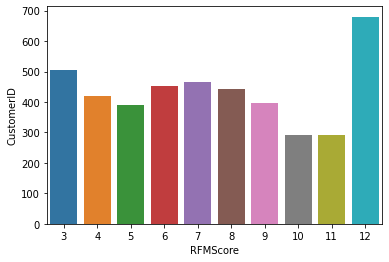

In [36]:
sns.barplot(data=RMFScore_table, x=RMFScore_table.RFMScore, y=RMFScore_table.CustomerID)


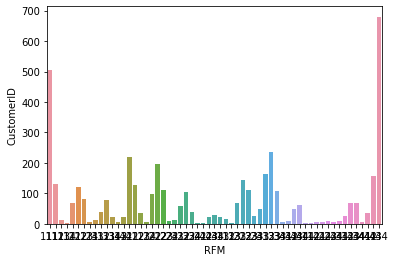

In [37]:
sns.barplot(data=RMF_table, x=RMF_table.RFM, y=RMF_table.CustomerID)

In [38]:
final_table.head()

,CustomerID,PrecioDia,FrecuencyRel,NofDay,NofDayScore,FrecuencyRelScore,PrecioDiaScore
0,12346.0,236.759509,0.003067,326,4,4,1
1,12347.0,11.711957,0.019022,3,1,2,1
2,12348.0,5.006240,0.011142,76,3,3,2
3,12349.0,92.502632,0.052632,19,2,1,1
4,12350.0,1.075241,0.003215,311,4,4,4


### Conclusiones método RFM

- El mètodo de preferencia de las variables RFM nos da un modelo con demasiados subgrupos, lo que hace muy dificil de clasificar a los clientes.

- Además, los resultados de este método variarian según el modelo de negocio que queramos implementar, cambiando el orden de las variables RFM

- El mètodo de unión de las variables RFM nos genera una cantidad más de subgrupos más reducidad pero lleva a la simplificación excesiva de los mismos.

- La primer conclusión valida que generan ambos métodos es que tenemos un gran conjunto de clientes que no se gastan mucho dinero, compran con poca frecuencia y no lo hacen desde hace mucho tiempo

- Y la segunda, es que por el contrario, tenemos una cantidad bastante importante de clientes fidelizados, que gastan dinero, con frecuencia y hace poco tiempo

### Clasificación utilizando Hierarchical clustering de Unsupervised Machine Learning

Para utilizar este mètodo no necesitamos los cuantiles, ya que nos darian datos demasiado similares para todos los clientes. Por ello, utilizaremos los datos relativos de las variables RFM

In [39]:
final_table_UL = final_table.drop(['NofDayScore','FrecuencyRelScore','PrecioDiaScore'], axis=1)
final_table_UL.set_index('CustomerID', inplace = True)
final_table_UL

,PrecioDia,FrecuencyRel,NofDay
CustomerID,,,
12346.0,236.759509,0.003067,326
12347.0,11.711957,0.019022,3
12348.0,5.006240,0.011142,76
12349.0,92.502632,0.052632,19
12350.0,1.075241,0.003215,311
...,...,...,...
18280.0,0.649640,0.003597,278
18281.0,0.446519,0.005525,181
18282.0,1.401969,0.015748,8


Crearemos un Hierarchical clustering sin un número definido de clusters para poder establecer posteriormente cual sería el mejor número a elegir

In [40]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

result = clustering.fit_predict(final_table_UL)

result

array([2175, 3822, 3689, ...,    2,    1,    0])

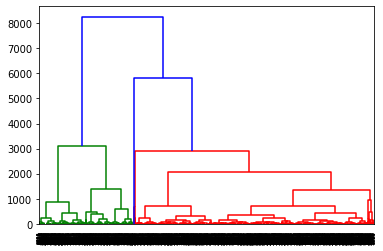

In [41]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    
    dendrogram(linkage_matrix, **kwargs)
    
plot_dendrogram(clustering)

Partiendo de la gráfica anterior la linea vertical mñas larga sin cortar no lleva a utilizar 3 clusters para nuestro análisis final. 

In [42]:
clustering2 = AgglomerativeClustering(n_clusters=3)

result2 = clustering2.fit_predict(final_table_UL)

result2

array([0, 1, 1, ..., 1, 1, 1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Frecuencia/UltimaCompra')

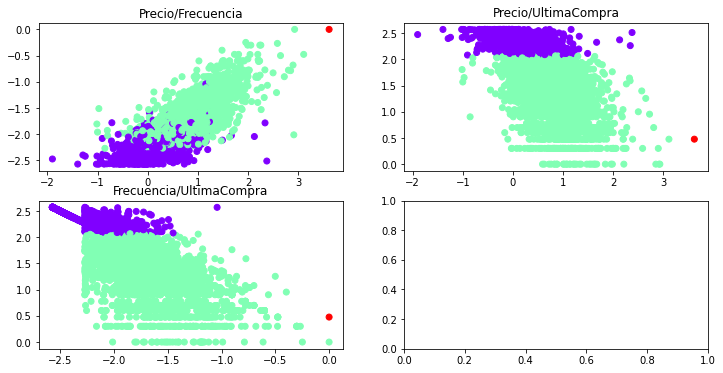

In [43]:
f, ax = plt.subplots(2, 2)
f.set_size_inches(12, 6)
ax[0, 0].scatter(np.log10(final_table_UL.iloc[:,0].values.astype(float)), np.log10(final_table_UL.iloc[:,1].values.astype(float)), c=clustering2.labels_, cmap='rainbow')
ax[0, 1].scatter(np.log10(final_table_UL.iloc[:,0].values.astype(float)), np.log10(final_table_UL.iloc[:,2].values.astype(float)), c=clustering2.labels_, cmap='rainbow')
ax[1, 0].scatter(np.log10(final_table_UL.iloc[:,1].values.astype(float)),np.log10(final_table_UL.iloc[:,2].values.astype(float)), c=clustering2.labels_, cmap='rainbow')
ax[0, 0].set_title('Precio/Frecuencia')
ax[0, 1].set_title('Precio/UltimaCompra')
ax[1, 0].set_title('Frecuencia/UltimaCompra')

## Conclusiones Hierarchical clustering

- Aunque podríamos elegir cualquier otro número de clusters, la grafica nos lleva a pensar que eligiendo 3 crearemos unos subconjuntos bien diferenciados.

- tenemos unos pocos clientes (rojo) que han comprado recientemente, se han gastado una cantidad grande de dinero y lo hacen con frecuencia. Aunque la relación entre frecuencia y ultima compra puede estar contaminada si el usuario solo ha realizado una compra.

- El grupo más popular (verde) responde a todos los que tienen las tres característa o en niveles bajos o medios

- Y el último grupo (morado) tiene una gran frecuencia en la compra y han comprado en los últimos días, pero el dinero no les influye en gran medida




## Conclusiones finales

Aunque el método RFM puede ser de gran utilidad en los extremos de los datos, genera mucha incertidumbre en los datos medios. Por otra parte, su fácil implementación y su sencillez hace que sea útil para un primer análisis.

Por otro lado, el método de agrupación jerárquica no lleva a datos más precisos, pero más difíciles de entender, y conllevaran, probablemente, la necesidad de un mayor entendimiento de negocio para su aplicación.
